# Image Segmentation
An image is made up of pixels. Image segmentation groups similar pixels to create masks, revealing detailed understanding at the pixel level. This involves training neural networks to assign labels to each pixel for accurate segmentation.

# Import libraries

In [32]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
from zipfile import ZipFile 
import keras.backend as K
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os

# Dataset Preparation

Unzipping all the files from carvana datasets

In [33]:
train_zip = "/kaggle/input/carvana-image-masking-challenge/train.zip"
with ZipFile(train_zip, 'r') as zip_: 
    zip_.extractall('/kaggle/working')

In [34]:
train_mask_zip = "/kaggle/input/carvana-image-masking-challenge/train_masks.zip"
with ZipFile(train_mask_zip, 'r') as zip_: 
    zip_.extractall('/kaggle/working')

In [35]:
print("Train set:  ", len(os.listdir("/kaggle/working/train")))
print("Train masks:", len(os.listdir("/kaggle/working/train_masks")))

Train set:   5088
Train masks: 5088


In [36]:
car_ids = []
paths = []
for dirname, _, filenames in os.walk('/kaggle/working/train'):
    for filename in filenames:
        path = os.path.join(dirname, filename)    
        paths.append(path)
        
        car_id = filename.split(".")[0]
        car_ids.append(car_id)

d = {"id": car_ids, "car_path": paths}
df = pd.DataFrame(data = d)
df = df.set_index('id')
df

,car_path
id,
c3dafdb02e7f_05,/kaggle/working/train/c3dafdb02e7f_05.jpg
6752de44b721_14,/kaggle/working/train/6752de44b721_14.jpg
528eb34a4c29_13,/kaggle/working/train/528eb34a4c29_13.jpg
69915dab0755_14,/kaggle/working/train/69915dab0755_14.jpg
f4cd1286d5f4_08,/kaggle/working/train/f4cd1286d5f4_08.jpg
...,...
c4f1840b2a65_02,/kaggle/working/train/c4f1840b2a65_02.jpg
f3eee6348205_11,/kaggle/working/train/f3eee6348205_11.jpg
1258cf954183_03,/kaggle/working/train/1258cf954183_03.jpg


In [37]:
car_ids = []
mask_path = []
for dirname, _, filenames in os.walk('/kaggle/working/train_masks'):
    for filename in filenames:
        path = os.path.join(dirname, filename)
        mask_path.append(path)
        
        car_id = filename.split(".")[0]
        car_id = car_id.split("_mask")[0]
        car_ids.append(car_id)

        
d = {"id": car_ids,"mask_path": mask_path}
mask_df = pd.DataFrame(data = d)
mask_df = mask_df.set_index('id')
mask_df

,mask_path
id,
c9acf5847ef1_07,/kaggle/working/train_masks/c9acf5847ef1_07_ma...
c7145a80089e_14,/kaggle/working/train_masks/c7145a80089e_14_ma...
78bfb9c780db_06,/kaggle/working/train_masks/78bfb9c780db_06_ma...
1aba91a601c6_06,/kaggle/working/train_masks/1aba91a601c6_06_ma...
784ca55262c2_10,/kaggle/working/train_masks/784ca55262c2_10_ma...
...,...
3bca821c8c41_07,/kaggle/working/train_masks/3bca821c8c41_07_ma...
e2230d0ceb02_05,/kaggle/working/train_masks/e2230d0ceb02_05_ma...
90b65c521a8b_08,/kaggle/working/train_masks/90b65c521a8b_08_ma...


Making a proper dataframe with all usefulpaths

In [38]:
df["mask_path"] = mask_df["mask_path"]
df

,car_path,mask_path
id,,
c3dafdb02e7f_05,/kaggle/working/train/c3dafdb02e7f_05.jpg,/kaggle/working/train_masks/c3dafdb02e7f_05_ma...
6752de44b721_14,/kaggle/working/train/6752de44b721_14.jpg,/kaggle/working/train_masks/6752de44b721_14_ma...
528eb34a4c29_13,/kaggle/working/train/528eb34a4c29_13.jpg,/kaggle/working/train_masks/528eb34a4c29_13_ma...
69915dab0755_14,/kaggle/working/train/69915dab0755_14.jpg,/kaggle/working/train_masks/69915dab0755_14_ma...
f4cd1286d5f4_08,/kaggle/working/train/f4cd1286d5f4_08.jpg,/kaggle/working/train_masks/f4cd1286d5f4_08_ma...
...,...,...
c4f1840b2a65_02,/kaggle/working/train/c4f1840b2a65_02.jpg,/kaggle/working/train_masks/c4f1840b2a65_02_ma...
f3eee6348205_11,/kaggle/working/train/f3eee6348205_11.jpg,/kaggle/working/train_masks/f3eee6348205_11_ma...
1258cf954183_03,/kaggle/working/train/1258cf954183_03.jpg,/kaggle/working/train_masks/1258cf954183_03_ma...


We'll flip the image and normalize pixel values to range from 0 to 1.

In [39]:
img_size = [256,256]

def data_augmentation(car_img, mask_img):

    if tf.random.uniform(()) > 0.5:
        car_img = tf.image.flip_left_right(car_img)
        mask_img = tf.image.flip_left_right(mask_img)

    return car_img, mask_img

def preprocessing(car_path, mask_path):
    car_img = tf.io.read_file(car_path) 
    car_img = tf.image.decode_jpeg(car_img, channels=3)
    car_img = tf.image.resize(car_img, img_size)
    car_img = tf.cast(car_img, tf.float32) / 255.0
    
    mask_img = tf.io.read_file(mask_path)
    mask_img = tf.image.decode_jpeg(mask_img, channels=3)
    mask_img = tf.image.resize(mask_img, img_size)
    mask_img = mask_img[:,:,:1]    
    mask_img = tf.math.sign(mask_img)
    
    
    return car_img, mask_img

def create_dataset(df, train = False):
    if not train:
        ds = tf.data.Dataset.from_tensor_slices((df["car_path"].values, df["mask_path"].values))
        ds = ds.map(preprocessing, tf.data.AUTOTUNE)
    else:
        ds = tf.data.Dataset.from_tensor_slices((df["car_path"].values, df["mask_path"].values))
        ds = ds.map(preprocessing, tf.data.AUTOTUNE)
        ds = ds.map(data_augmentation, tf.data.AUTOTUNE)

    return ds

Spliting the dataset into train and test

In [40]:
train_df, valid_df = train_test_split(df, random_state=42, test_size=.25)
train = create_dataset(train_df, train = True)
valid = create_dataset(valid_df)

In [41]:
TRAIN_LENGTH = len(train_df)
BATCH_SIZE = 16
BUFFER_SIZE = 1000

In [42]:
train_dataset = train.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
train_dataset = train_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)
valid_dataset = valid.batch(BATCH_SIZE)

Image and it's corresponding mask

In [43]:
def display(display_list):
    plt.figure(figsize=(15, 15))

    title = ['Input Image', 'True Mask', 'Predicted Mask']

    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.title(title[i])
        plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i])) 
        plt.axis('off')
    plt.show()

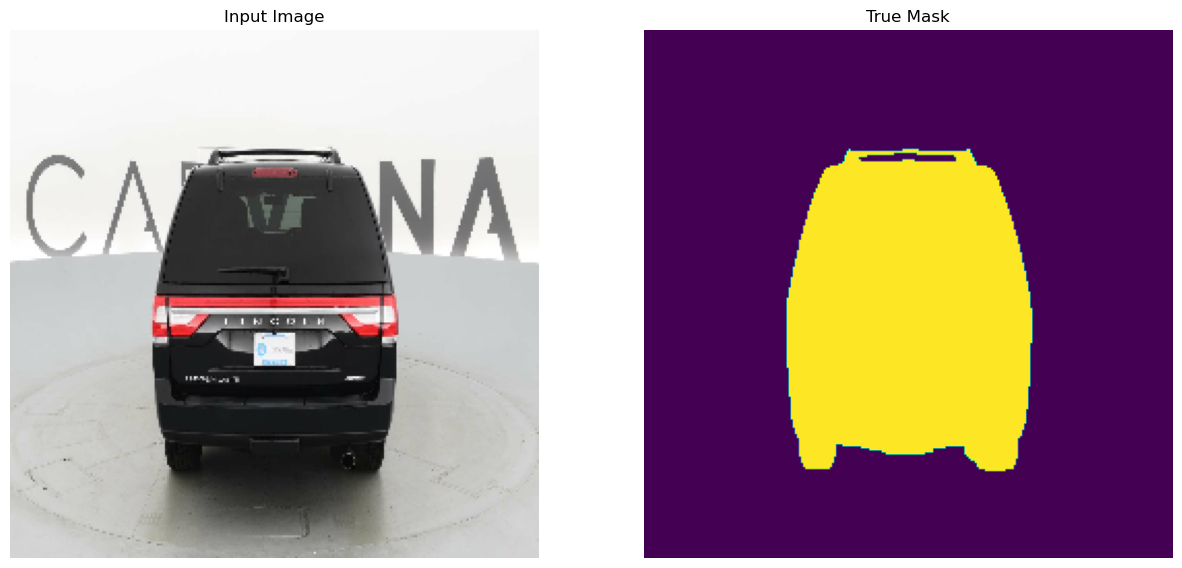

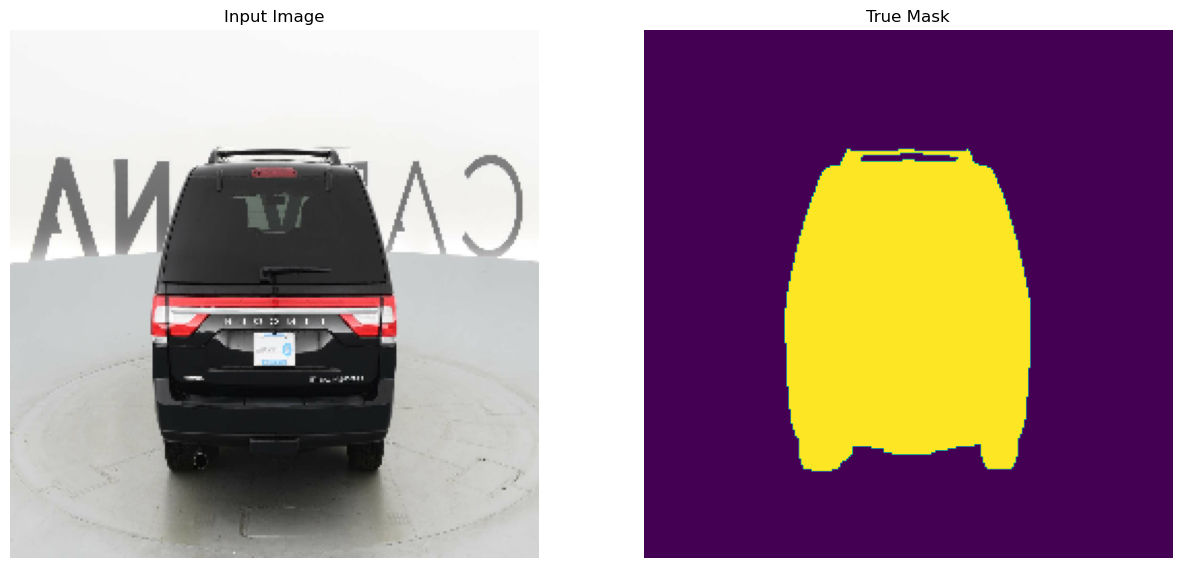

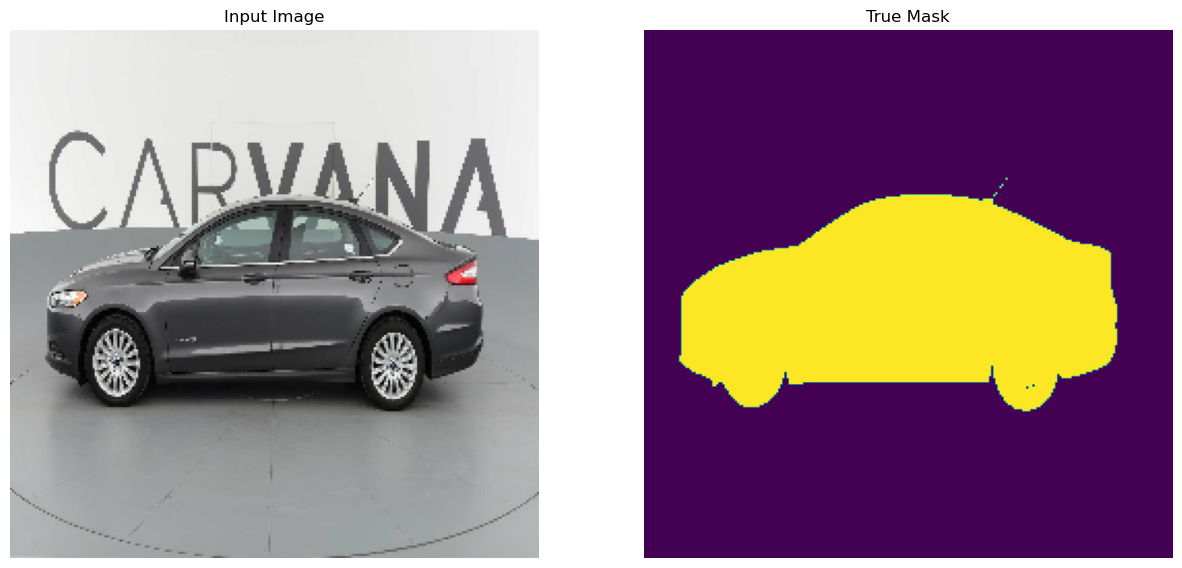

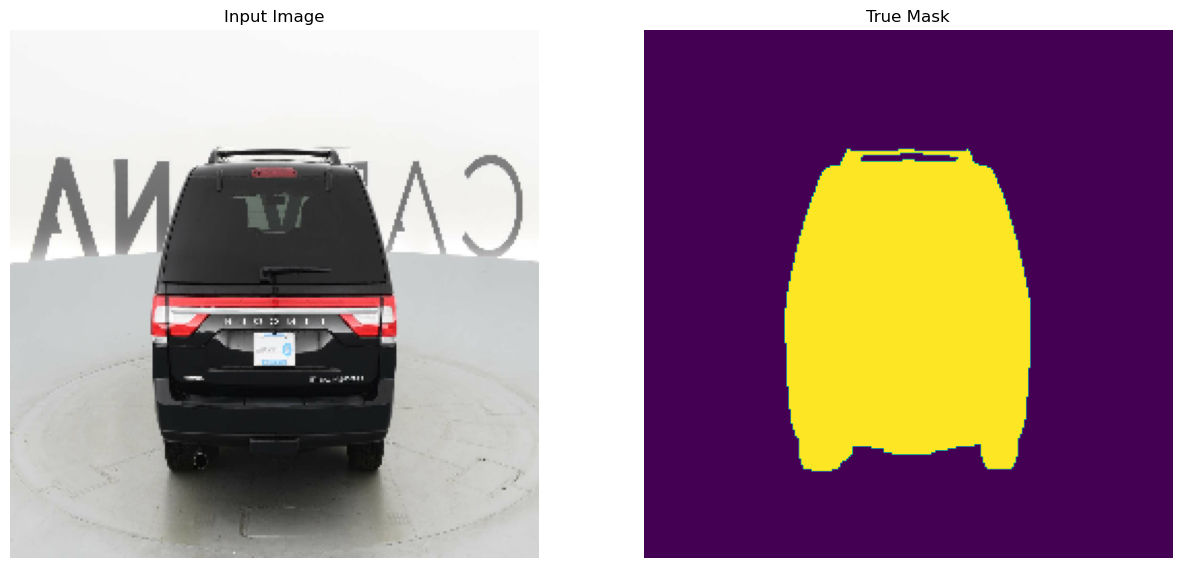

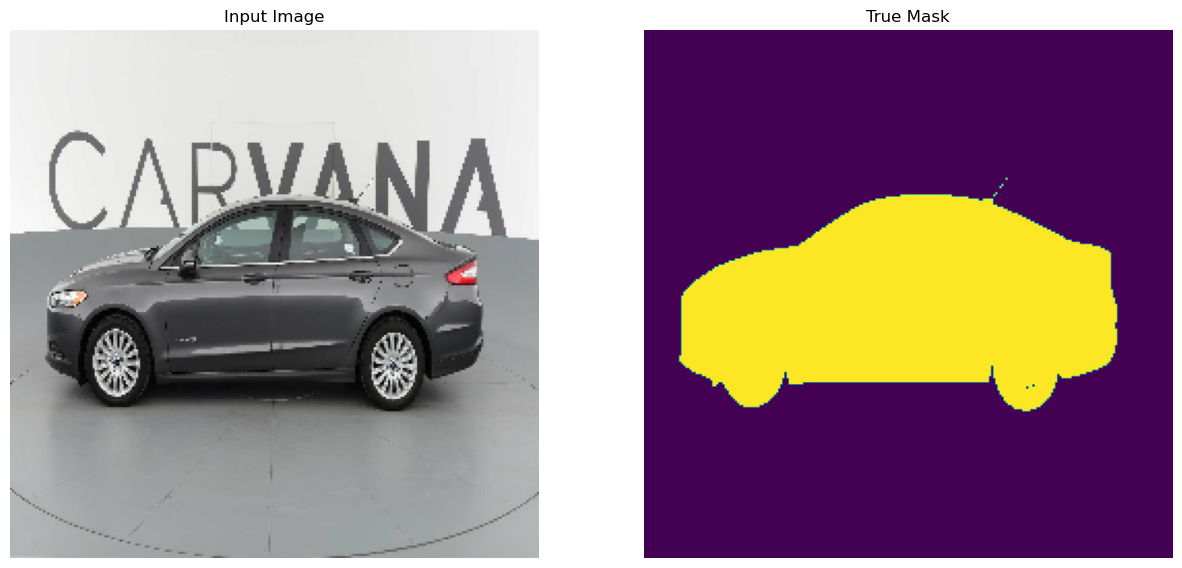

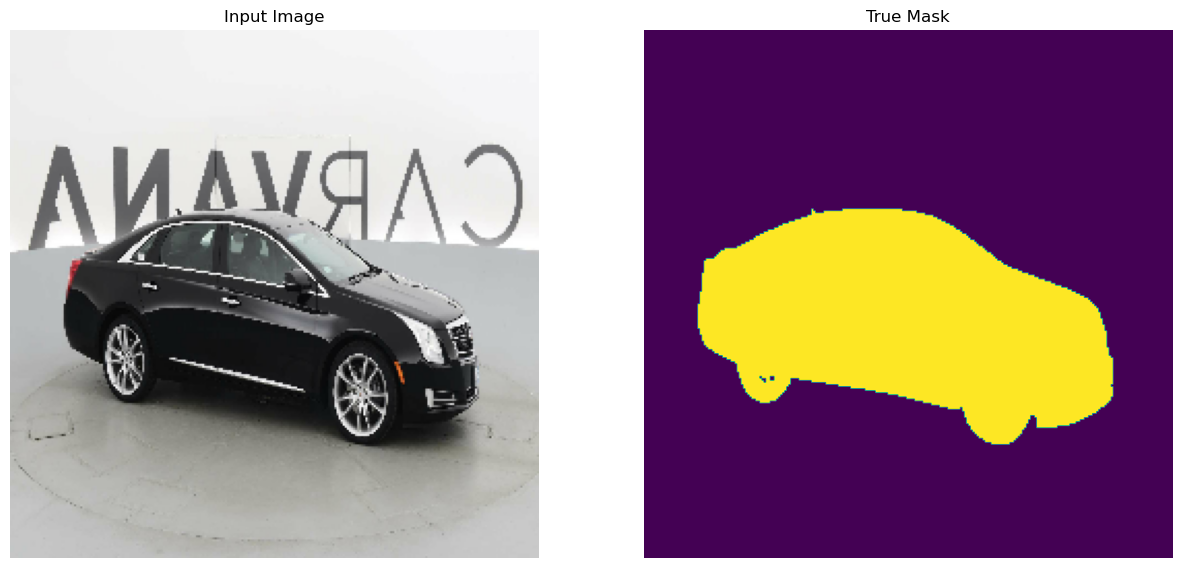

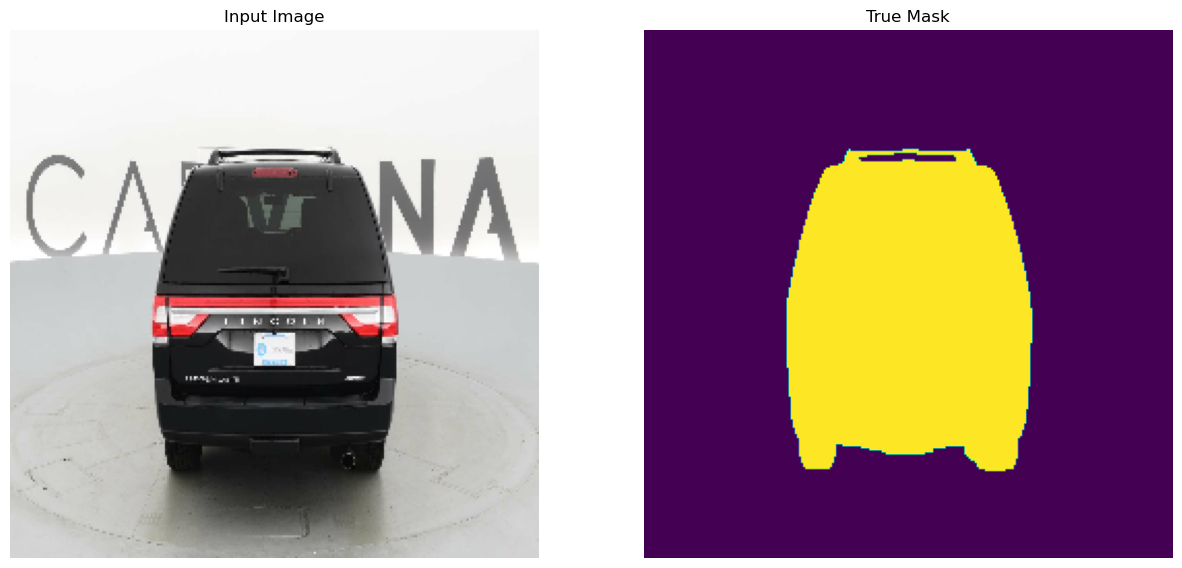

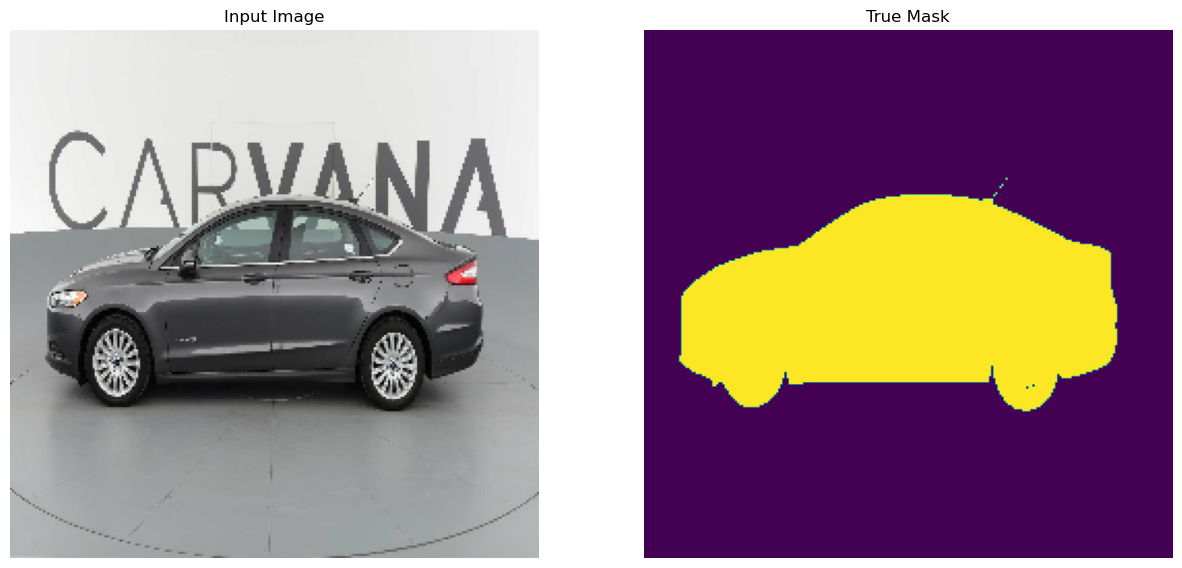

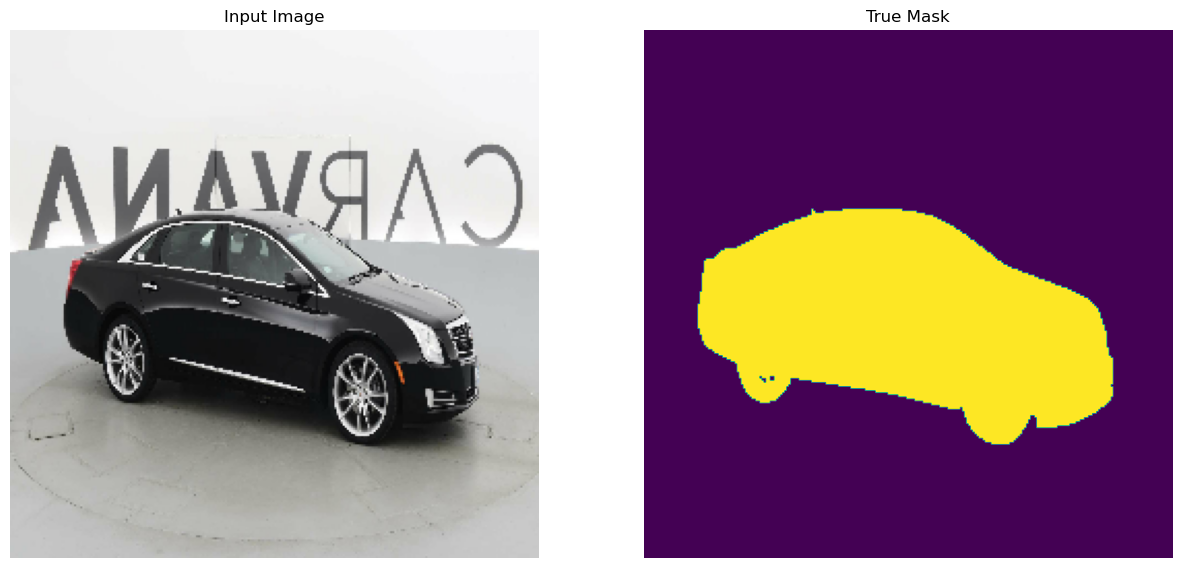

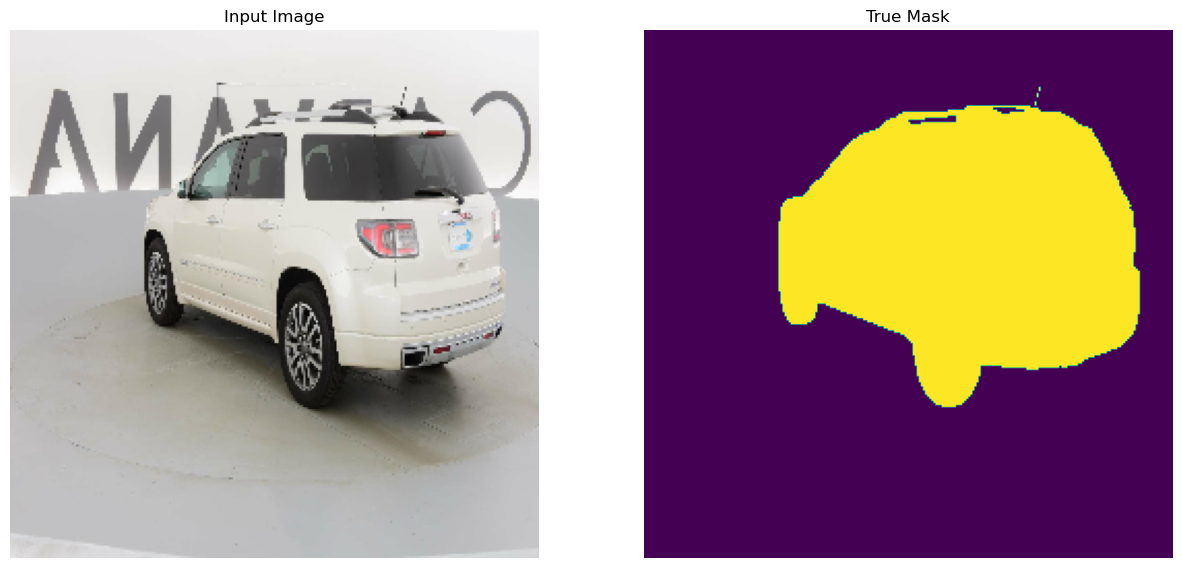

In [44]:
for i in range(5):
   for image, mask in train.take(i):
        sample_image, sample_mask = image, mask
        display([sample_image, sample_mask])

# Model

We'll employ a U-Net model, featuring an encoder (downsampler) and decoder (upsampler). To enhance feature learning and parameter efficiency, we'll utilize a pre-trained VGG16 model as the encoder. This VGG16 model is readily available in tf.keras.applications.

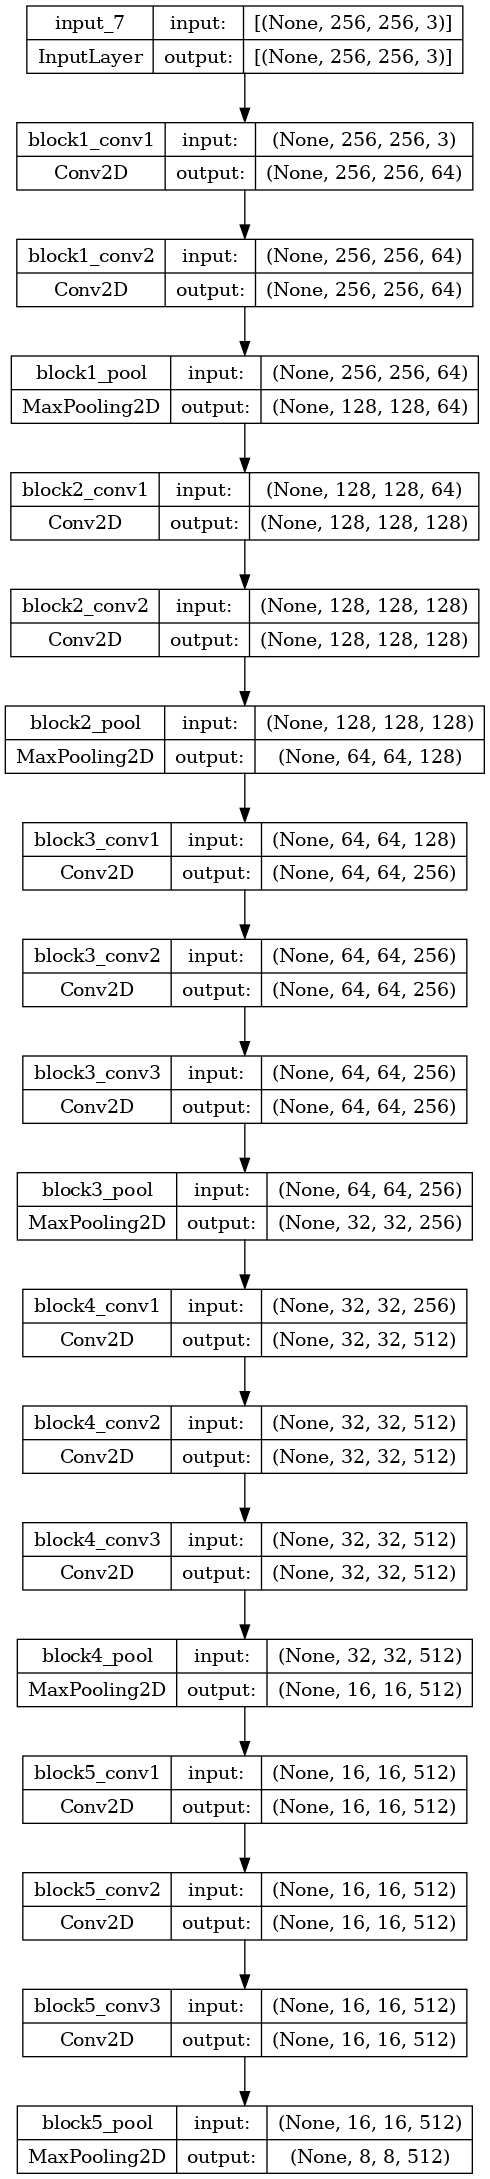

In [45]:
base_model = tf.keras.applications.VGG16(input_shape=[256, 256, 3], include_top=False)

tf.keras.utils.plot_model(base_model, show_shapes=True)

In [46]:
# Use the activations of these layers
layer_names = [
    'block2_conv1',   # 64x64
    'block3_conv1',   # 32x32
    'block4_conv1',   # 16x16
    'block5_conv1',  # 8x8
    'block5_pool',      # 4x4
]
base_model_outputs = [base_model.get_layer(name).output for name in layer_names]

# Create the feature extraction model
down_stack = tf.keras.Model(inputs=base_model.input, outputs=base_model_outputs)
down_stack.trainable = False

In [47]:
def upsample(filters, size, norm_type='batchnorm', apply_dropout=False):
    initializer = tf.random_normal_initializer(0., 0.02)
    
    result = tf.keras.Sequential()
    result.add(
      tf.keras.layers.Conv2DTranspose(filters, size, strides=2,
                                      padding='same',
                                      kernel_initializer=initializer,
                                      use_bias=False))

    if norm_type.lower() == 'batchnorm':
        result.add(tf.keras.layers.BatchNormalization())
    elif norm_type.lower() == 'instancenorm':
        result.add(InstanceNormalization())

    if apply_dropout:
        result.add(tf.keras.layers.Dropout(0.5))

        result.add(tf.keras.layers.ReLU())

    return result

up_stack = [
    upsample(512, 3),  # 4x4 -> 8x8
    upsample(256, 3),  # 8x8 -> 16x16
    upsample(128, 3),  # 16x16 -> 32x32
    upsample(64, 3),   # 32x32 -> 64x64
]

In [48]:
def unet_model(output_channels):
    inputs = tf.keras.layers.Input(shape=[256, 256, 3])

    # Downsampling through the model
    skips = down_stack(inputs)
    x = skips[-1]
    skips = reversed(skips[:-1])

  # Upsampling and establishing the skip connections
    for up, skip in zip(up_stack, skips):
        x = up(x)
        concat = tf.keras.layers.Concatenate()
        x = concat([x, skip])

  # This is the last layer of the model
    last = tf.keras.layers.Conv2DTranspose(
      output_channels, 3, strides=2, activation='sigmoid',
      padding='same')  #64x64 -> 128x128

    x = last(x)

    return tf.keras.Model(inputs=inputs, outputs=x)

# Train the Model

Compiled model with architecture:

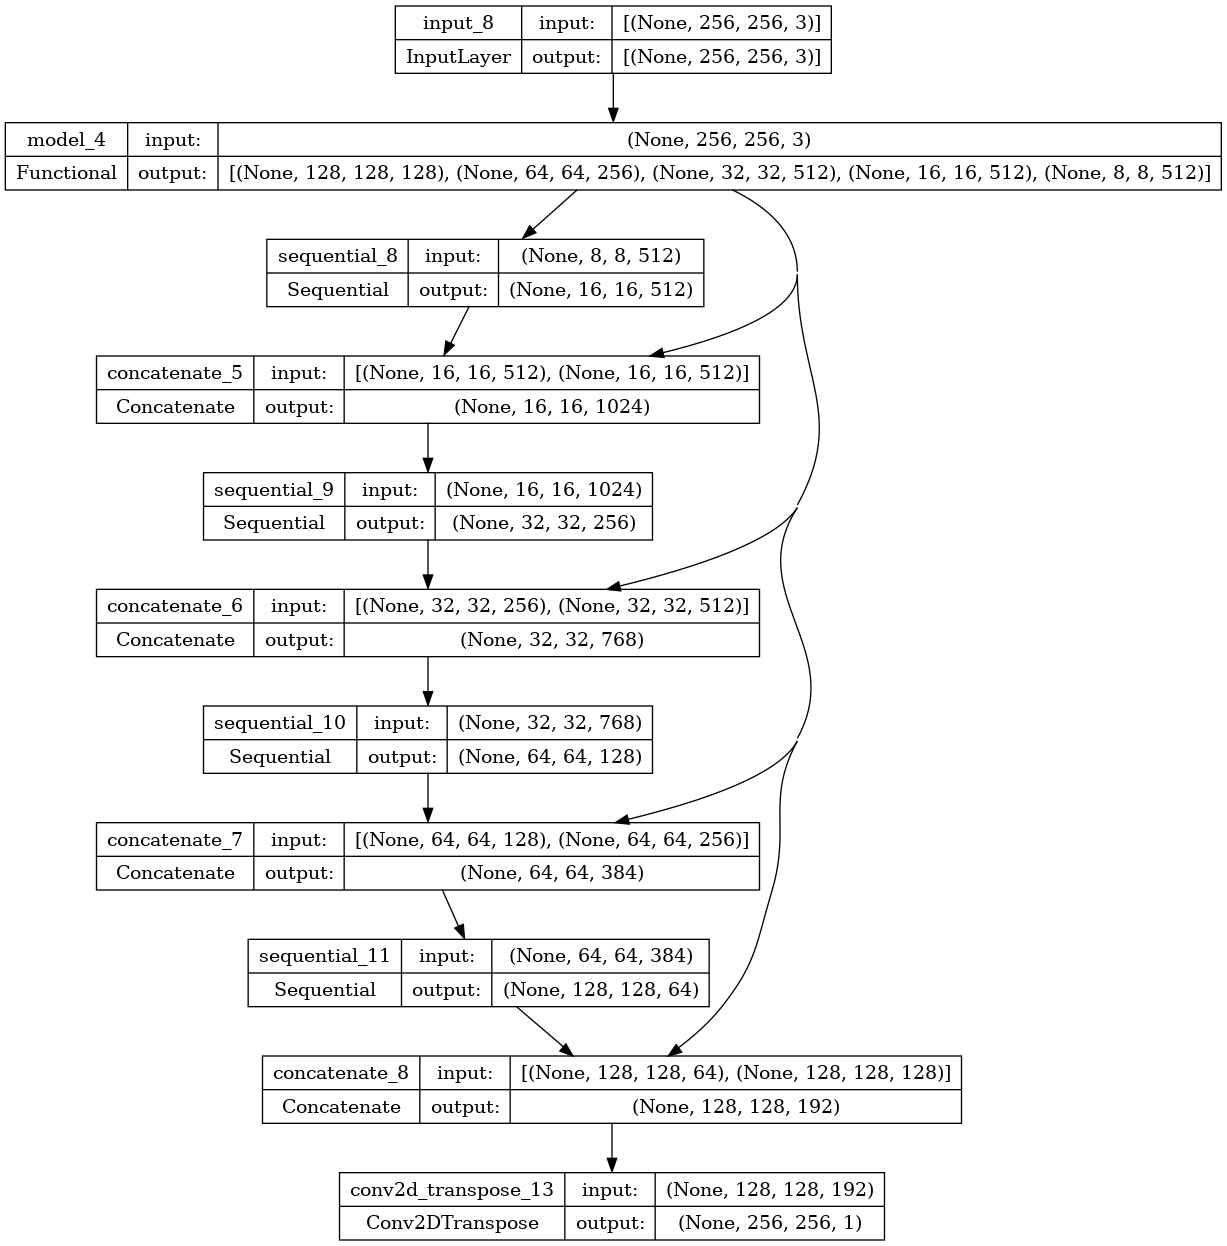

In [49]:
def dice_coef(y_true, y_pred, smooth=1):
    intersection = K.sum(y_true * y_pred, axis=[1,2,3])
    union = K.sum(y_true, axis=[1,2,3]) + K.sum(y_pred, axis=[1,2,3])
    return K.mean( (2. * intersection + smooth) / (union + smooth), axis=0)

def dice_loss(in_gt, in_pred):
    return 1-dice_coef(in_gt, in_pred)

model = unet_model(1)

model.compile(optimizer='adam',
              loss = dice_loss,
              metrics=[dice_coef,'binary_accuracy'])

tf.keras.utils.plot_model(model, show_shapes=True)

Let's test the model's predictions pre-training:

1/1 [==============================] - 1s 735ms/step


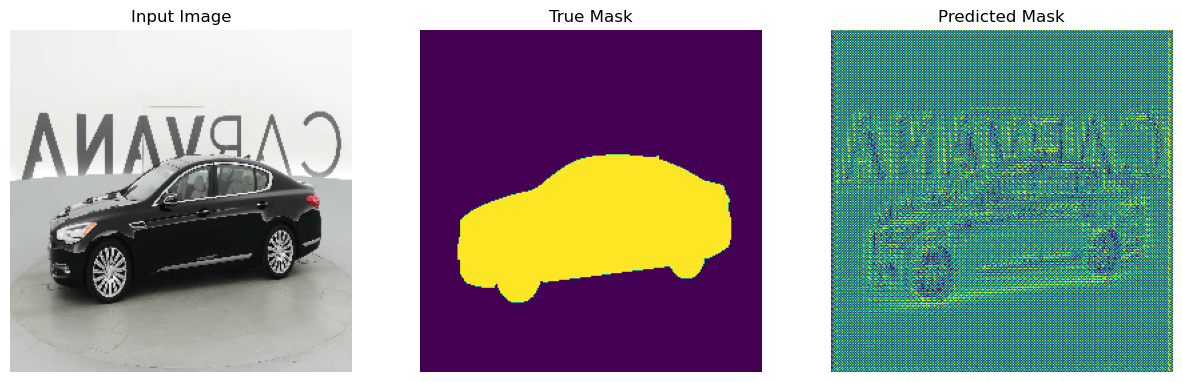

In [50]:
for images, masks in train_dataset.take(1):
    for img, mask in zip(images, masks):
        sample_image = img
        sample_mask = mask
        break
def visualize(display_list):
    plt.figure(figsize=(15, 15))
    title = ['Input Image', 'True Mask', 'Predicted Mask']
    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.title(title[i])
        plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i]))
        plt.axis('off')
    plt.show()

def show_predictions(sample_image, sample_mask):
    pred_mask = model.predict(sample_image[tf.newaxis, ...])
    pred_mask = pred_mask.reshape(img_size[0],img_size[1],1)
    visualize([sample_image, sample_mask, pred_mask])
    
show_predictions(sample_image, sample_mask)

In [51]:
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 model_4 (Functional)           [(None, 128, 128, 1  14714688    ['input_8[0][0]']                
                                28),                                                              
                                 (None, 64, 64, 256                                               
                                ),                                                                
                                 (None, 32, 32, 512                                         

Witness the model's evolution through training. An essential tool for this is the callback function outlined below:

Epoch 1/15
238/238 [==============================] - 2771s 12s/step - loss: 0.1001 - dice_coef: 0.8999 - binary_accuracy: 0.9433 - val_loss: 0.0228 - val_dice_coef: 0.9773 - val_binary_accuracy: 0.9918
Epoch 2/15
1/1 [==============================] - 0s 432ms/step


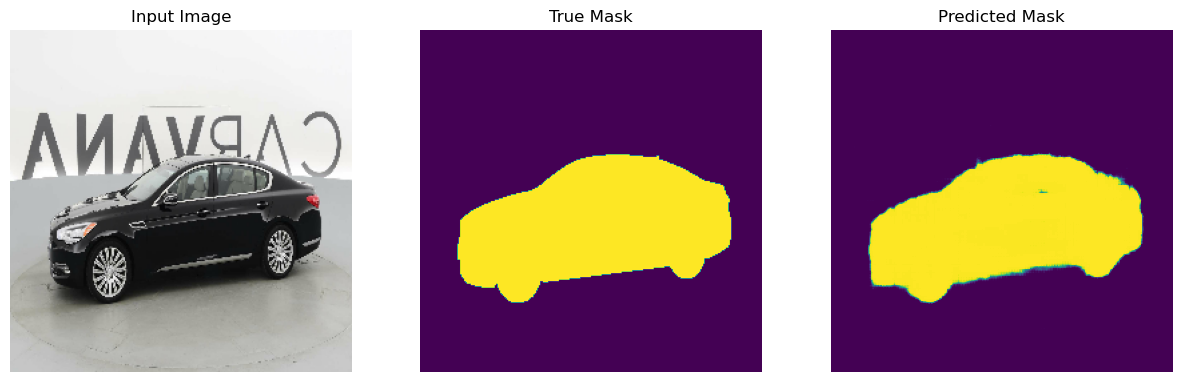

Epoch 3/15
238/238 [==============================] - 2668s 11s/step - loss: 0.0182 - dice_coef: 0.9818 - binary_accuracy: 0.9930 - val_loss: 0.0177 - val_dice_coef: 0.9823 - val_binary_accuracy: 0.9930
Epoch 4/15
238/238 [==============================] - 2683s 11s/step - loss: 0.0171 - dice_coef: 0.9829 - binary_accuracy: 0.9933 - val_loss: 0.0170 - val_dice_coef: 0.9830 - val_binary_accuracy: 0.9932
Epoch 5/15
1/1 [==============================] - 0s 442ms/step


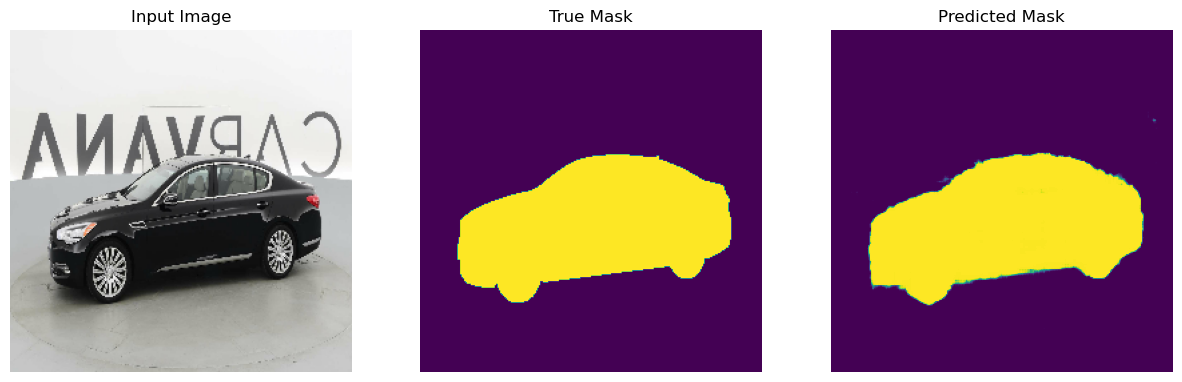

Epoch 6/15
 34/238 [===>..........................] - ETA: 29:20 - loss: 0.0157 - dice_coef: 0.9843 - binary_accuracy: 0.9938

In [ ]:
early_stop = tf.keras.callbacks.EarlyStopping(patience=4,restore_best_weights=True)

class DisplayCallback(tf.keras.callbacks.Callback):
    def on_epoch_begin(self, epoch, logs=None):
        if (epoch + 1) % 3 == 0:
            show_predictions(sample_image, sample_mask)
EPOCHS = 15
STEPS_PER_EPOCH = TRAIN_LENGTH // BATCH_SIZE

model_history = model.fit(train_dataset, epochs=EPOCHS,
                          steps_per_epoch=STEPS_PER_EPOCH,
                          validation_data=valid_dataset,
                          callbacks=[DisplayCallback(), early_stop])